In [103]:
import numpy as np
from numpy import sqrt, log
import random
import matplotlib.pyplot as plt

In [2]:
directory='/Users/julnow/Desktop/szkoła/KMS/1/'
params = directory + 'params.txt'

In [116]:
#read variables
variables = {}
with open(params) as f:
    for line in f:
        name, value = line.split(" = ")
        variables[name] = float(value)
n = int(variables['n'])
a = variables['a']
L = variables['L']
T =  variables['T']
k = 8.31e-3 # Boltzman const
m = 1.6605402e-27 # 1u
#kryształ
#(3)
N = n**3 
# (4)
b0 = np.array([a, 0, 0])
b1 = np.array([a/2, a*sqrt(3)/2, 0])
b2 = np.array([a/2, a*sqrt(3)/6, a*sqrt(2/3)])
# (5)
ri= np.zeros([3, N])
for i0 in range(n):
    for i1 in range(n):
        for i2 in range(n):
            i = i0 + i1 * n + i2 * n**2
            r = (i0 - (n-1)/2)*b0 +  (i1- (n-1)/2)*b1 + (i2 - (n-1)/2)*b2
            ri[:,i] = r
# (6)
ei= np.zeros([3, N])
const = - k * T /2
for i in range(1, N+1):
    x = const*log(random.uniform(0, 1))
    y = const*log(random.uniform(0, 1))
    z = const*log(random.uniform(0, 1))
    ei[:,i-1] = np.array([x, y, z])
# (7)
pi= np.zeros([3, N])
for i in range(1, N+1):
    x = sqrt(2*m*ei[0, i-1])
    if (random.uniform(0, 1) < .5):
        x *= -1
    y = sqrt(2*m*ei[1, i-1])
    if (random.uniform(0, 1) < .5):
        y *= -1
    z = sqrt(2*m*ei[2, i-1])
    if (random.uniform(0, 1) < .5):
        z *= -1
    pi[:,i-1] = np.array([x, y, z])
    


In [127]:
pi[1, :]

array([-9.73962155e-14,  1.83419133e-13, -1.73245994e-13, -3.43101102e-14,
        1.26433684e-13,  1.37740004e-13,  1.58742842e-13, -1.53913277e-13,
       -1.11386910e-13, -1.82364220e-13, -1.68800006e-13,  9.67737333e-14,
       -8.34337071e-14,  6.94702247e-14, -1.58303752e-13, -6.83092808e-14,
        1.78753241e-13, -1.28601658e-13, -1.34618703e-13, -8.38783706e-14,
       -1.14168786e-13,  9.12605524e-14,  2.08513304e-14,  2.05863610e-13,
       -6.18001311e-14, -1.13666300e-13,  4.68723286e-14, -6.00361676e-14,
        5.44353919e-14,  1.39768084e-13,  5.43402935e-14, -7.81315949e-14,
        2.94407313e-14, -4.51790542e-14,  1.62602852e-14,  8.10357852e-15,
       -5.60813386e-14,  8.80885426e-14,  4.98772135e-14, -1.65696423e-13,
       -2.53591945e-13, -5.18310499e-14, -3.05727302e-14, -1.22278949e-13,
       -1.11478720e-13, -8.01216382e-14,  2.01885828e-13, -1.66596231e-13,
       -2.31933072e-14, -1.64805211e-13, -1.02665800e-13, -9.85489335e-14,
       -2.36655114e-13,  

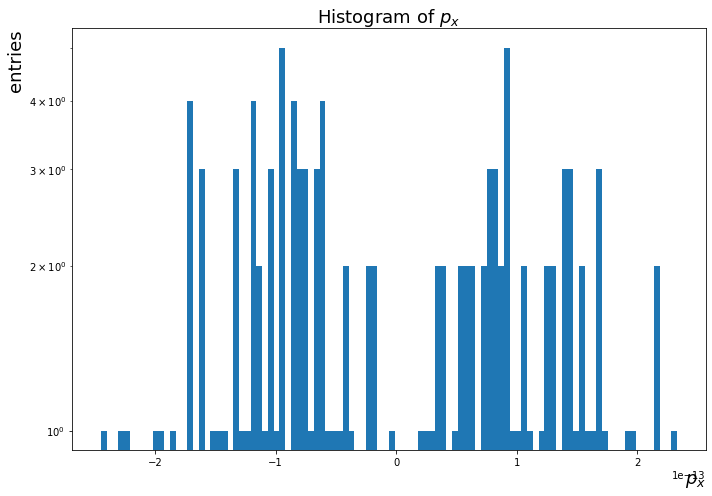

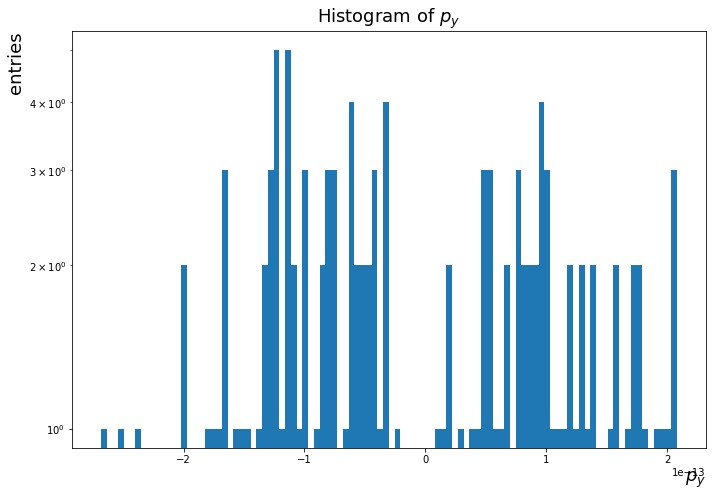

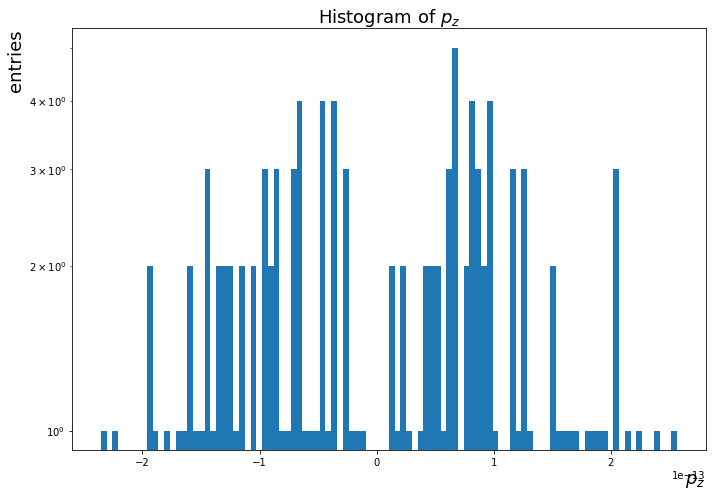

In [130]:
coords = ['x', 'y', 'z']
count = 0
for coord in coords:
    fig, ax = plt.subplots(figsize=(10,7))
    name = r'$p_{' + coord + r'}$'
    plt.title(r'Histogram of ' + name , fontsize=18)
    plt.xlabel(name, fontsize=18, loc='right')
    plt.ylabel("entries", fontsize=18, loc='top')
    plt.yscale('log')
    plt.hist(pi[count, :], bins=100)
    fig.tight_layout()
    count += 1